In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***
### ==> 1. Data Import and Exploration
***

In [5]:
df_bookings = pd.read_csv("datasets/fact_bookings.csv")
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100


In [5]:
df_bookings.shape

(134590, 12)

In [6]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [13]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

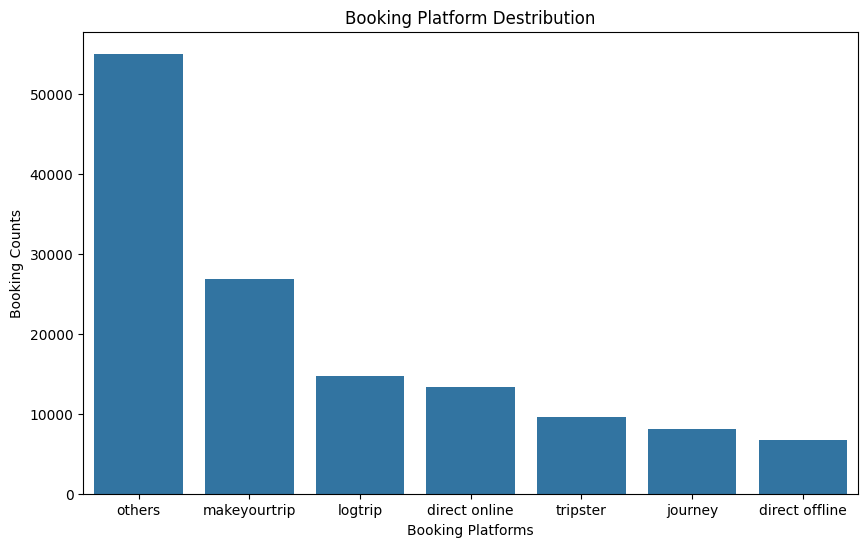

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(df_bookings.booking_platform.value_counts())

plt.title('Booking Platform Destribution')
plt.xlabel('Booking Platforms')
plt.ylabel('Booking Counts')
plt.show()

In [6]:
df_bookings.no_guests.min()

np.float64(-17.0)

In [7]:
df_bookings.revenue_generated.max()

np.int64(28560000)

In [8]:
df_bookings.isna().any()

booking_id           False
property_id          False
booking_date         False
check_in_date        False
checkout_date        False
no_guests             True
room_category        False
booking_platform     False
ratings_given         True
booking_status       False
revenue_generated    False
revenue_realized     False
dtype: bool

In [12]:
df_bookings[df_bookings.ratings_given.isna()].shape

(77907, 12)

In [25]:
df_date = pd.read_csv("datasets/dim_date.csv")
df_hotels = pd.read_csv("datasets/dim_hotels.csv")
df_rooms = pd.read_csv("datasets/dim_rooms.csv")
df_agg_bookings = pd.read_csv("datasets/fact_aggregated_bookings.csv")

In [15]:
df_date.shape

(92, 4)

In [16]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [21]:
df_hotels.head(6)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi


In [28]:
df_hotels.shape

(25, 4)

In [29]:
df_hotels.city.unique()

array(['Delhi', 'Mumbai', 'Hyderabad', 'Bangalore'], dtype=object)

In [31]:
df_hotels.city.value_counts()

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

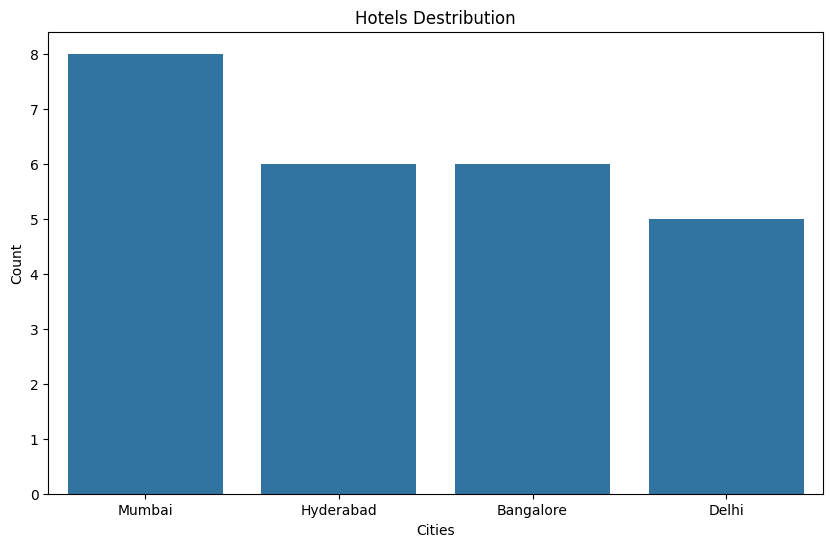

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(df_hotels.city.value_counts())

plt.title('Hotels Destribution')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

In [22]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [23]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [24]:
df_agg_bookings.isna().any()

property_id            False
check_in_date          False
room_category          False
successful_bookings    False
capacity                True
dtype: bool

In [25]:
df_agg_bookings.successful_bookings.max()

np.int64(123)

In [26]:
df_agg_bookings.capacity.max()

np.float64(50.0)

In [27]:
df_agg_bookings.shape

(9200, 5)

In [28]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [29]:
df_agg_bookings.groupby("property_id").successful_bookings.sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [30]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [31]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity].shape

(6, 5)

In [32]:
df_agg_bookings[df_agg_bookings.capacity == df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


***
### ==> 2. Data Cleaning
***

In [4]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


**Clean invalid guests**

In [5]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [6]:
df_bookings[df_bookings.no_guests<=0].shape

(9, 12)

In [179]:
df_bookings = df_bookings[df_bookings.no_guests>0]

In [8]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [10]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

**Outlier removal in revenue_generated by using 3 std**

In [11]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()
avg, std

(np.float64(15378.036937686695), np.float64(93040.1549314641))

In [12]:
higher_limit = avg + 3*std
higher_limit

np.float64(294498.50173207896)

In [13]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [180]:
df_bookings = df_bookings[df_bookings.revenue_generated<higher_limit]
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


**Fill the null values in df_agg_bookings**

In [15]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [35]:
df_agg_bookings.isnull().any()

property_id            False
check_in_date          False
room_category          False
successful_bookings    False
capacity                True
dtype: bool

In [16]:
df_agg_bookings.fillna({
    "capacity": df_agg_bookings.capacity.mean()
}, inplace=True)

In [17]:
df_agg_bookings.isnull().any()

property_id            False
check_in_date          False
room_category          False
successful_bookings    False
capacity               False
dtype: bool

In df_agg_bookings find out records that have successful_bookings value greater than capacity. Filter those records

In [38]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [19]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


***
### ==> 3. Data Transformation
***

**Create occupancy percentage column**

In [20]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


In [21]:
df_agg_bookings["occ_pct"] = df_agg_bookings.successful_bookings/df_agg_bookings.capacity

In [22]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
4,16558,1-May-22,RT1,18,19.0,0.947368
5,17560,1-May-22,RT1,28,40.0,0.700000


**Convert it into a percentage**

In [23]:
df_agg_bookings.occ_pct = round(df_agg_bookings.occ_pct*100, 2)

In [24]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


***
### ==> 4. Insights Generation
***

**What is an average occupancy rate in each of the room categories?**

In [25]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


In [26]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [27]:
df_agg_bookings = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on="room_id")

In [28]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard


Remove the room_category and room_id columns because now we have the room_class

In [33]:
df_agg_bookings.drop(['room_category', 'room_id'], axis=1, inplace=True)

In [34]:
df_agg_bookings.head()

,property_id,check_in_date,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,25,30.0,83.33,Standard
1,19562,1-May-22,28,30.0,93.33,Standard
2,19563,1-May-22,23,30.0,76.67,Standard
3,16558,1-May-22,18,19.0,94.74,Standard
4,17560,1-May-22,28,40.0,70.00,Standard


Now, find the average occupancy rate in each of the room categories?

In [35]:
df_agg_bookings.room_class.unique()

array(['Standard', 'Elite', 'Premium', 'Presidential'], dtype=object)

In [41]:
round(df_agg_bookings.groupby('room_class').occ_pct.mean(), 2)

room_class
Elite           58.01
Premium         58.03
Presidential    59.28
Standard        57.89
Name: occ_pct, dtype: float64

**Print average occupancy rate per city**

In [45]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [47]:
df_hotels.shape

(25, 4)

In [44]:
df_agg_bookings.head(3)

,property_id,check_in_date,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,25,30.0,83.33,Standard
1,19562,1-May-22,28,30.0,93.33,Standard
2,19563,1-May-22,23,30.0,76.67,Standard


In [55]:
df_agg_bookings = df_agg_bookings.merge(df_hotels[['property_id', 'city']], on="property_id")

In [56]:
df_agg_bookings.head(3)

,property_id,check_in_date,successful_bookings,capacity,occ_pct,room_class,city
0,16559,1-May-22,25,30.0,83.33,Standard,Mumbai
1,19562,1-May-22,28,30.0,93.33,Standard,Bangalore
2,19563,1-May-22,23,30.0,76.67,Standard,Bangalore


In [57]:
df_agg_bookings.city.unique()

array(['Mumbai', 'Bangalore', 'Delhi', 'Hyderabad'], dtype=object)

In [63]:
round(df_agg_bookings.groupby('city').occ_pct.mean(), 2)

city
Bangalore    56.33
Delhi        61.51
Hyderabad    58.12
Mumbai       57.91
Name: occ_pct, dtype: float64

**When was the occupancy better? Weekday or weekend**

In [74]:
df_agg_bookings.head(3)

,property_id,check_in_date,successful_bookings,capacity,occ_pct,room_class,city
0,16559,1-May-22,25,30.0,83.33,Standard,Mumbai
1,19562,1-May-22,28,30.0,93.33,Standard,Bangalore
2,19563,1-May-22,23,30.0,76.67,Standard,Bangalore


In [72]:
df_date.shape

(92, 4)

In [71]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [66]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9194 entries, 0 to 9193
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9194 non-null   int64  
 1   check_in_date        9194 non-null   object 
 2   successful_bookings  9194 non-null   int64  
 3   capacity             9194 non-null   float64
 4   occ_pct              9194 non-null   float64
 5   room_class           9194 non-null   object 
 6   city                 9194 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 502.9+ KB


In [67]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


We have to change the dtype of date in both dataframes

In [79]:
df_date.date = pd.to_datetime(df_date.date, format='mixed')

In [81]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [82]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [85]:
df_agg_bookings.check_in_date = pd.to_datetime(df_agg_bookings.check_in_date, format='mixed')

In [87]:
df_agg_bookings.head(3)

,property_id,check_in_date,successful_bookings,capacity,occ_pct,room_class,city
0,16559,2022-05-01,25,30.0,83.33,Standard,Mumbai
1,19562,2022-05-01,28,30.0,93.33,Standard,Bangalore
2,19563,2022-05-01,23,30.0,76.67,Standard,Bangalore


In [88]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9194 entries, 0 to 9193
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9194 non-null   int64         
 1   check_in_date        9194 non-null   datetime64[ns]
 2   successful_bookings  9194 non-null   int64         
 3   capacity             9194 non-null   float64       
 4   occ_pct              9194 non-null   float64       
 5   room_class           9194 non-null   object        
 6   city                 9194 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 502.9+ KB


Now, merge them 

In [90]:
df_agg_bookings.head(3)

,property_id,check_in_date,successful_bookings,capacity,occ_pct,room_class,city
0,16559,2022-05-01,25,30.0,83.33,Standard,Mumbai
1,19562,2022-05-01,28,30.0,93.33,Standard,Bangalore
2,19563,2022-05-01,23,30.0,76.67,Standard,Bangalore


In [92]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [94]:
df_agg_bookings = pd.merge(df_agg_bookings, df_date, left_on='check_in_date', right_on='date')

In [98]:
df_agg_bookings.head(3)

,property_id,check_in_date,successful_bookings,capacity,occ_pct,room_class,city,date,mmm yy,week no,day_type
0,16559,2022-05-01,25,30.0,83.33,Standard,Mumbai,2022-05-01,May 22,W 19,weekend
1,19562,2022-05-01,28,30.0,93.33,Standard,Bangalore,2022-05-01,May 22,W 19,weekend
2,19563,2022-05-01,23,30.0,76.67,Standard,Bangalore,2022-05-01,May 22,W 19,weekend


In [101]:
df_agg_bookings = df_agg_bookings.drop('date', axis=1)

In [102]:
df_agg_bookings.head(3)

,property_id,check_in_date,successful_bookings,capacity,occ_pct,room_class,city,mmm yy,week no,day_type
0,16559,2022-05-01,25,30.0,83.33,Standard,Mumbai,May 22,W 19,weekend
1,19562,2022-05-01,28,30.0,93.33,Standard,Bangalore,May 22,W 19,weekend
2,19563,2022-05-01,23,30.0,76.67,Standard,Bangalore,May 22,W 19,weekend


Now, check when was the occupancy rate better? Weekday or Weekend

In [104]:
df_agg_bookings.day_type.unique()

array(['weekend', 'weekeday'], dtype=object)

In [106]:
round(df_agg_bookings.groupby('day_type').occ_pct.mean(), 2)

day_type
weekeday    51.81
weekend     73.96
Name: occ_pct, dtype: float64

**In the month of june, what is the occupancy for different cities**

In [108]:
df_agg_bookings.head(3)

,property_id,check_in_date,successful_bookings,capacity,occ_pct,room_class,city,mmm yy,week no,day_type
0,16559,2022-05-01,25,30.0,83.33,Standard,Mumbai,May 22,W 19,weekend
1,19562,2022-05-01,28,30.0,93.33,Standard,Bangalore,May 22,W 19,weekend
2,19563,2022-05-01,23,30.0,76.67,Standard,Bangalore,May 22,W 19,weekend


In [110]:
df_agg_bookings['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [112]:
df_jun = df_agg_bookings[df_agg_bookings['mmm yy']=='Jun 22']

In [113]:
df_jun.head(3)

,property_id,check_in_date,successful_bookings,capacity,occ_pct,room_class,city,mmm yy,week no,day_type
3098,16559,2022-06-01,14,30.0,46.67,Standard,Mumbai,Jun 22,W 23,weekeday
3099,18560,2022-06-01,18,30.0,60.00,Standard,Hyderabad,Jun 22,W 23,weekeday
3100,19562,2022-06-01,18,30.0,60.00,Standard,Bangalore,Jun 22,W 23,weekeday


In [114]:
round(df_jun.groupby('city').occ_pct.mean(), 2)

city
Bangalore    55.85
Delhi        61.46
Hyderabad    57.69
Mumbai       57.79
Name: occ_pct, dtype: float64

**We got new data for the month of august. Append that to existing data**

In [115]:
df_august = pd.read_csv('datasets/new_data_august.csv')
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


I think I've make a mistake when I merge df_hotels to df_agg_bookings I don't merge some column now I do that

In [122]:
df_agg_bookings = pd.merge(df_agg_bookings, df_hotels, on="property_id")

In [123]:
df_agg_bookings.head(3)

,property_id,check_in_date,successful_bookings,capacity,occ_pct,room_class,mmm yy,week no,day_type,property_name,category,city
0,16559,2022-05-01,25,30.0,83.33,Standard,May 22,W 19,weekend,Atliq Exotica,Luxury,Mumbai
1,19562,2022-05-01,28,30.0,93.33,Standard,May 22,W 19,weekend,Atliq Bay,Luxury,Bangalore
2,19563,2022-05-01,23,30.0,76.67,Standard,May 22,W 19,weekend,Atliq Palace,Business,Bangalore


Rename the occ% in august dataframe

In [127]:
df_august = df_august.rename(columns={
    "occ%": "occ_pct",
})

In [128]:
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ_pct
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [133]:
df_agg_bookings = pd.concat([df_agg_bookings, df_august], ignore_index=True)

df_agg_bookings.tail(3)

Ok, we found some errors in check_in_date column so we'll fix it

In [137]:
df_agg_bookings.check_in_date = pd.to_datetime(df_agg_bookings.check_in_date, format='mixed')

In [138]:
df_agg_bookings.head(3)

,property_id,check_in_date,successful_bookings,capacity,occ_pct,room_class,mmm yy,week no,day_type,property_name,category,city,room_category
0,16559,2022-05-01,25,30.0,83.33,Standard,May 22,W 19,weekend,Atliq Exotica,Luxury,Mumbai,NaN
1,19562,2022-05-01,28,30.0,93.33,Standard,May 22,W 19,weekend,Atliq Bay,Luxury,Bangalore,NaN
2,19563,2022-05-01,23,30.0,76.67,Standard,May 22,W 19,weekend,Atliq Palace,Business,Bangalore,NaN


In [139]:
df_agg_bookings.tail(3)

,property_id,check_in_date,successful_bookings,capacity,occ_pct,room_class,mmm yy,week no,day_type,property_name,category,city,room_category
9198,19560,2022-08-01,20,26.0,76.92,Standard,Aug-22,W 32,weekeday,Atliq City,Business,Bangalore,RT1
9199,17561,2022-08-01,18,26.0,69.23,Standard,Aug-22,W 32,weekeday,Atliq Blu,Luxury,Mumbai,RT1
9200,17564,2022-08-01,10,16.0,62.50,Standard,Aug-22,W 32,weekeday,Atliq Seasons,Business,Mumbai,RT1


**Print revenue realized per city**

In [141]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


I have to merge the df_hotels to df_bookings

In [143]:
df_bookings = pd.merge(df_bookings, df_hotels, on="property_id")

In [144]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [146]:
df_bookings.groupby('city').revenue_realized.sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

**Print month by month revenue**

First merge the df_date to df_bookings

In [184]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [185]:
df_bookings.check_in_date = pd.to_datetime(df_bookings.check_in_date, format='mixed')

In [186]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [188]:
df_bookings = pd.merge(df_bookings, df_date, left_on='check_in_date', right_on='date')

In [189]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,2022-05-05,May 22,W 19,weekeday


In [191]:
df_bookings = df_bookings.drop(['date'], axis=1)

In [192]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,May 22,W 19,weekeday


In [193]:
df_bookings['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [194]:
df_bookings.groupby('mmm yy').revenue_realized.sum()

mmm yy
Jul 22    389940912
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64

**Print revenue realized per hotel type**

In [196]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [197]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,May 22,W 19,weekeday


I've to merge them together

In [199]:
df_bookings = pd.merge(df_bookings, df_hotels, on='property_id') 

In [201]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,mmm yy,week no,day_type,property_name,category,city
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,May 22,W 19,weekeday,Atliq Grands,Luxury,Delhi
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,May 22,W 19,weekeday,Atliq Grands,Luxury,Delhi
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,May 22,W 19,weekeday,Atliq Grands,Luxury,Delhi


Now, print the revenue realized per hotel type

In [203]:
df_bookings.category.unique()

array(['Luxury', 'Business'], dtype=object)

In [204]:
df_bookings.groupby('category').revenue_realized.sum()

category
Business    451950715
Luxury      723557067
Name: revenue_realized, dtype: int64

**Print average rating per city**

In [205]:
df_bookings.city.unique()

array(['Delhi', 'Mumbai', 'Hyderabad', 'Bangalore'], dtype=object)

In [207]:
round(df_bookings.groupby('city').ratings_given.mean(), 1)

city
Bangalore    3.4
Delhi        3.8
Hyderabad    3.7
Mumbai       3.6
Name: ratings_given, dtype: float64

**Print a pie chart of revenue realized per booking platform**

In [209]:
df_bookings.booking_platform.unique()

array(['tripster', 'others', 'direct offline', 'makeyourtrip', 'logtrip',
       'journey', 'direct online'], dtype=object)

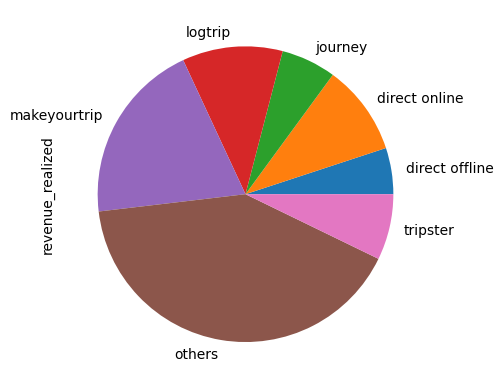

In [35]:
df_bookings.groupby('booking_platform').revenue_realized.sum().plot.pie()

plt.show()